In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

In [27]:
df = pd.read_csv('/Users/bryanzhang/Desktop/career/projects/harmonic_horizons/data/tracks.csv')

In [28]:
df.dropna(axis=0, how='any', inplace=True)
removed_cols = ['Unnamed: 0', 'type', 'uri', 'track_href', 'analysis_url', 'id']
df = df.drop(columns=removed_cols)

song_counts = df['name'].value_counts()
duplicate_songs = song_counts[song_counts > 1].index

track_df = df[~df['name'].isin(duplicate_songs)]
track_df = track_df.set_index('name')

In [29]:
def adjust_time(time):
    return time/1000

track_df['duration_ms'] = track_df['duration_ms'].apply(adjust_time)
track_df = track_df.rename(columns={'duration_ms': 'duration_s'})

In [30]:
mood_distribution = track_df.groupby('mood').count()
mood_distribution

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,popularity
mood,,,,,,,,,,,,,,
angry,1729,1729,1729,1729,1729,1729,1729,1729,1729,1729,1729,1729,1729,1729
calm,2157,2157,2157,2157,2157,2157,2157,2157,2157,2157,2157,2157,2157,2157
happy,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602
sad,1769,1769,1769,1769,1769,1769,1769,1769,1769,1769,1769,1769,1769,1769


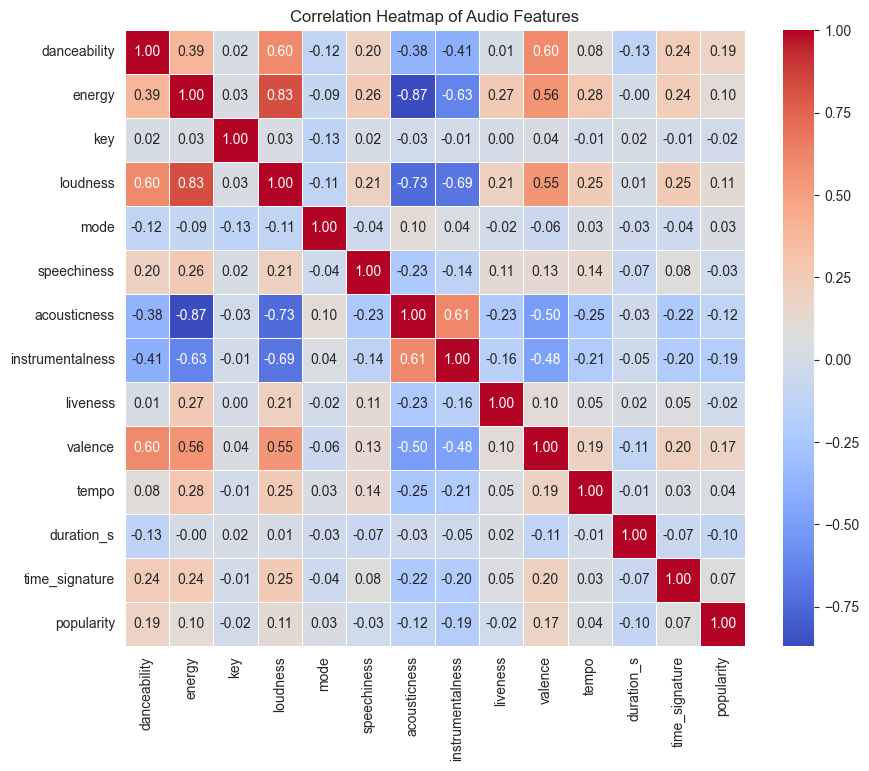

In [31]:
corr_matrix = track_df.drop(columns=['mood']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Audio Features')
plt.show()

In [32]:
X = track_df.drop(columns=['mood'])
y = track_df['mood']

F_values, P_values = f_classif(X, y)
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': F_values, 'P-Value': P_values})

anova_results.sort_values(by='P-Value', ascending=False)

,Feature,F-Value,P-Value
2,key,2.605094,5.006987e-02
4,mode,13.202303,1.358716e-08
11,duration_s,24.324660,1.175746e-15
12,time_signature,118.588621,5.619814e-75
8,liveness,139.567244,6.446982e-88
10,tempo,150.493685,1.287058e-94
13,popularity,222.930230,2.401904e-138
5,speechiness,431.290268,7.787325e-258
0,danceability,624.920359,0.000000e+00
1,energy,4715.214424,0.000000e+00


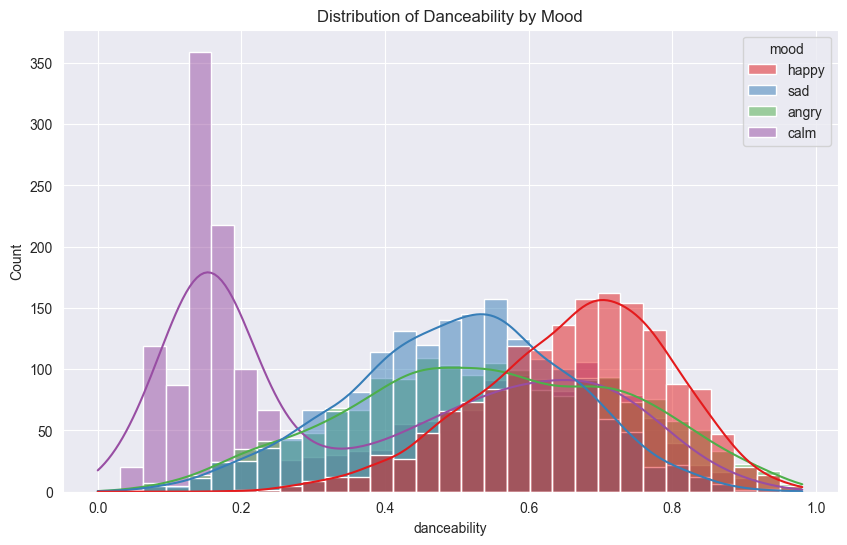

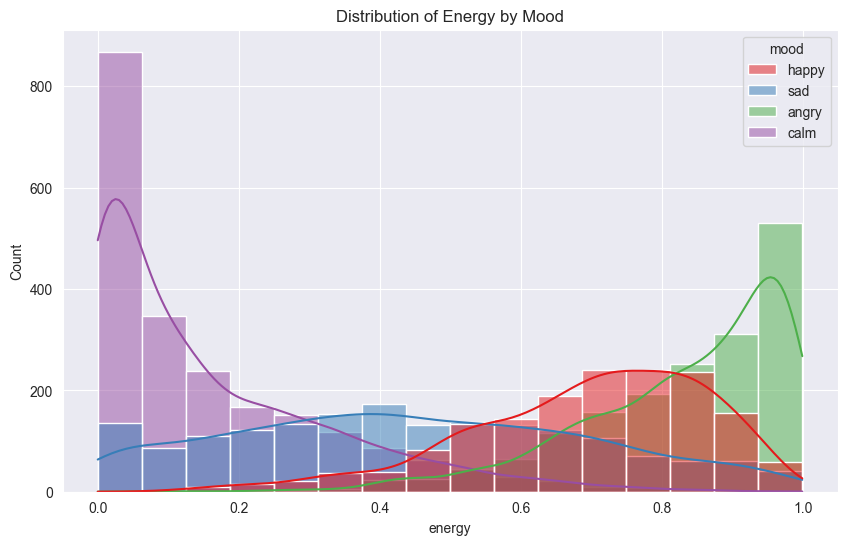

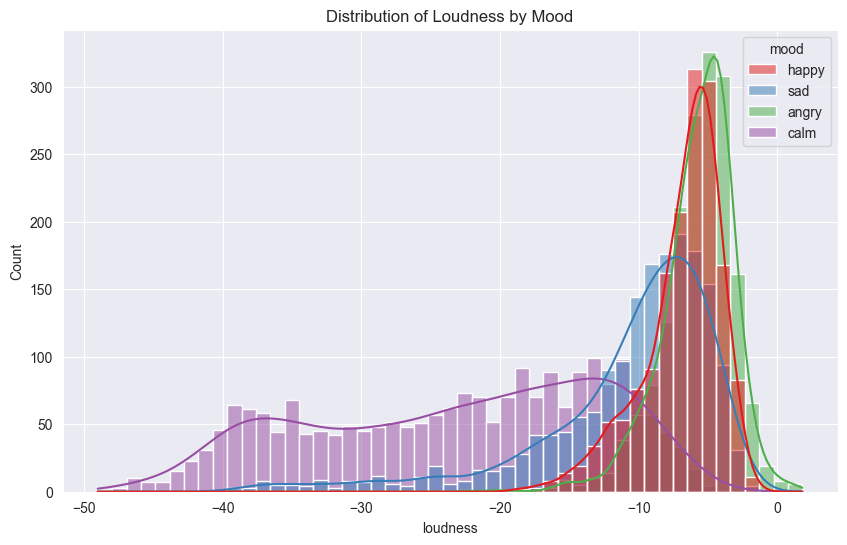

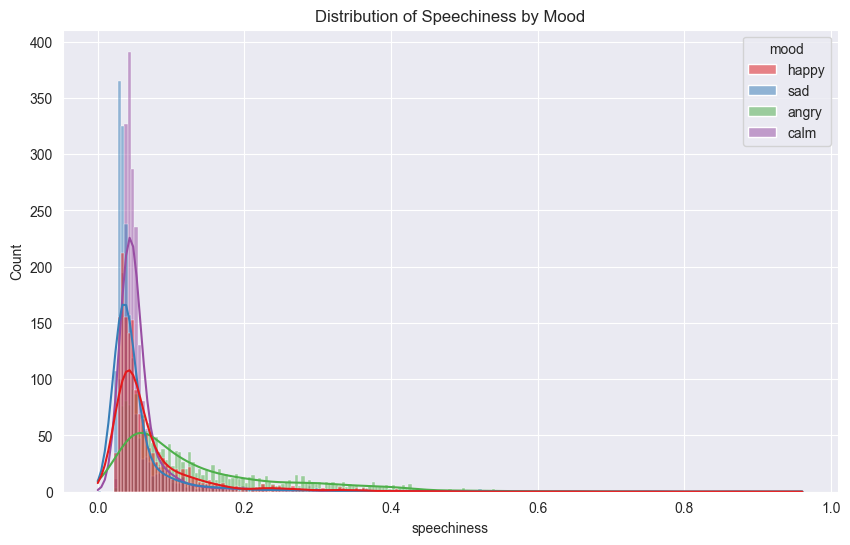

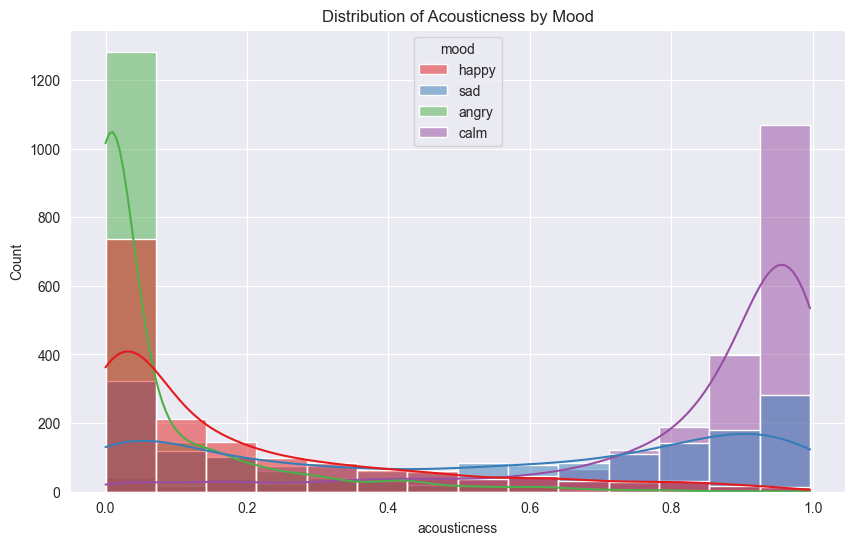

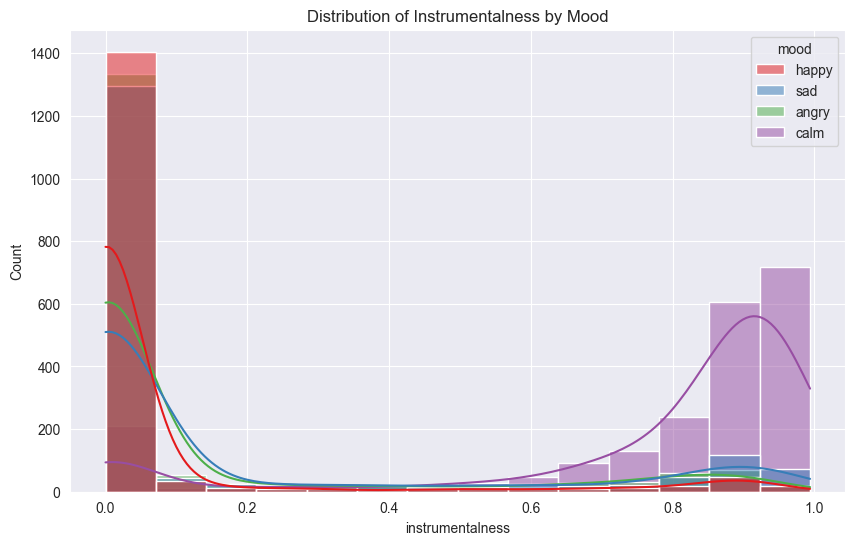

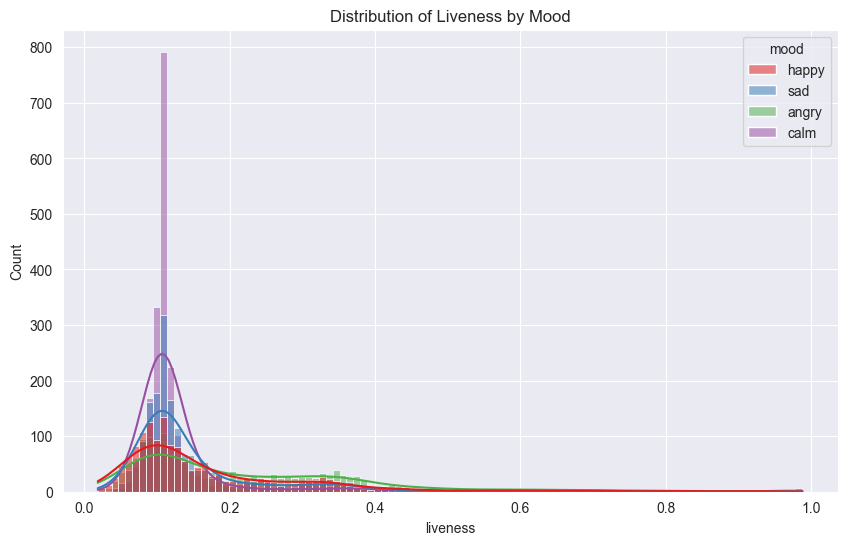

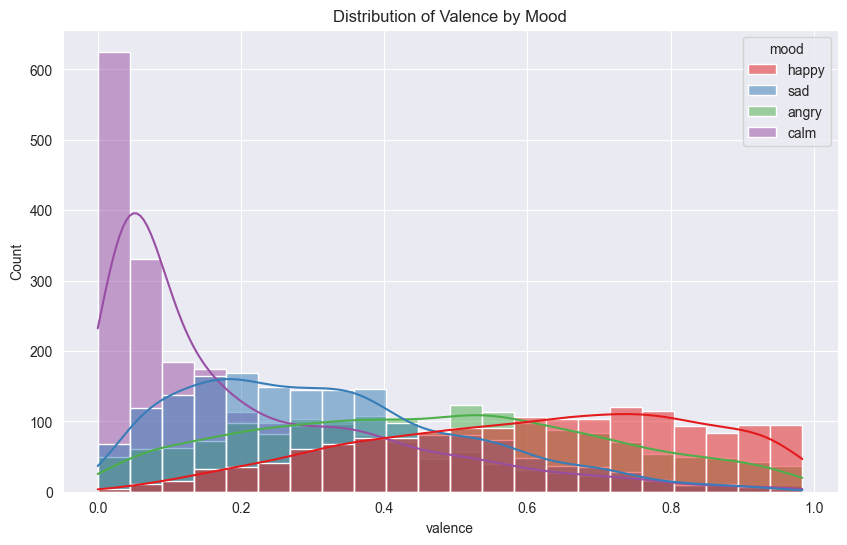

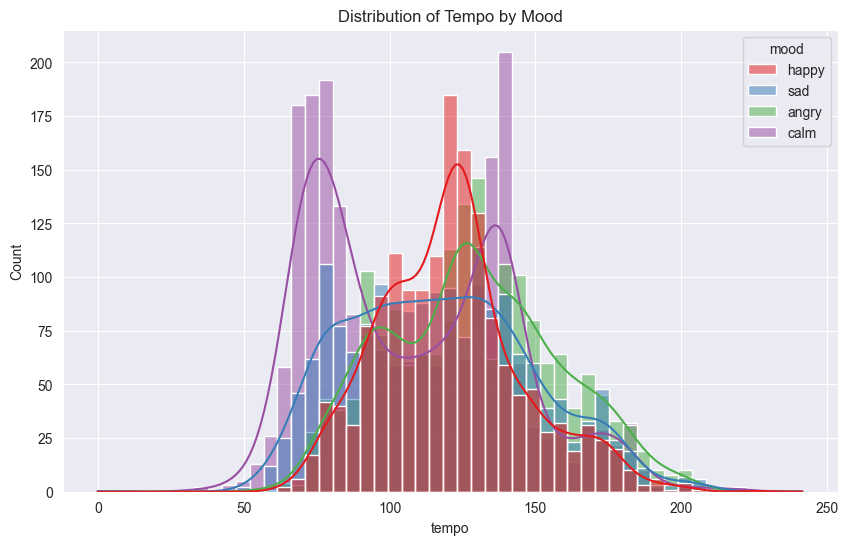

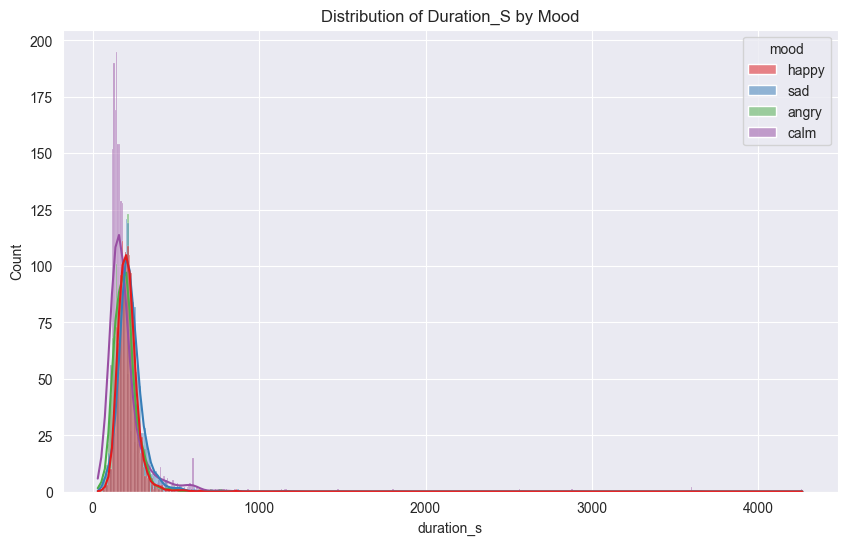

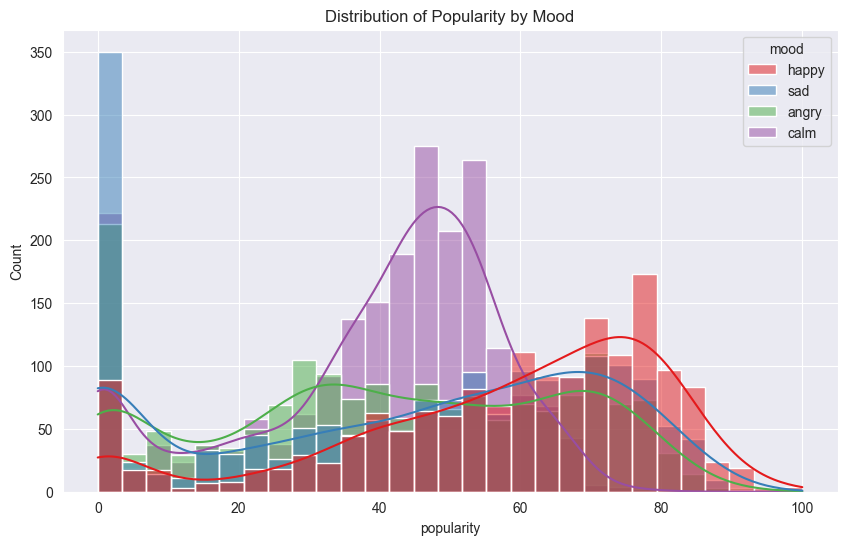

In [33]:
def create_visualization(df, vis_type, **kwargs):
    audio_features = df.drop(columns=['mood', 'key', 'time_signature', 'mode']).columns
    
    for feature in audio_features:
        plt.figure(figsize=(10, 6))
        vis_type(data=df, x=feature, **kwargs)
        
        plt.title(f'Distribution of {feature.title()} by Mood')
        plt.xlabel(f'{feature}')
        
        if vis_type == sns.histplot:
            plt.ylabel('Count')
        else:
            plt.ylabel('Value')
            plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
        
        plt.show()

create_visualization(track_df, sns.histplot, hue='mood', palette='Set1', kde=True)

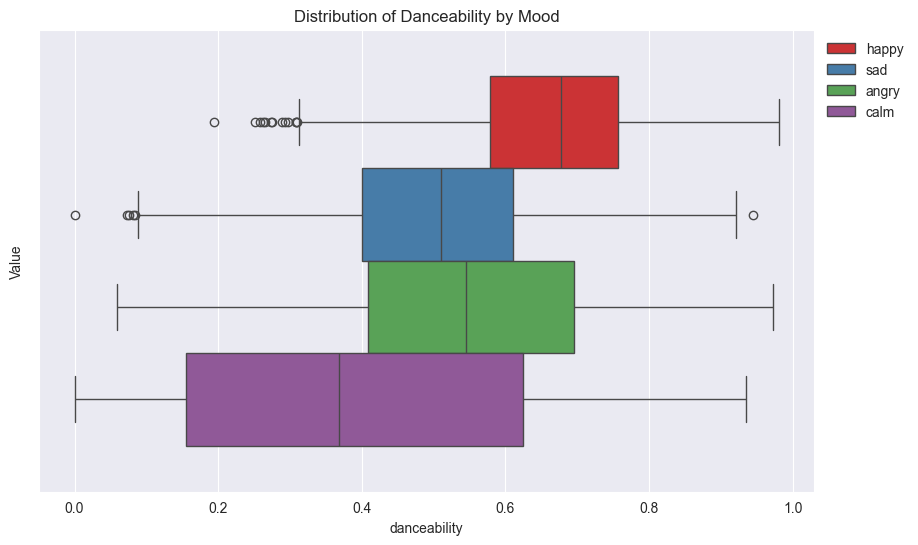

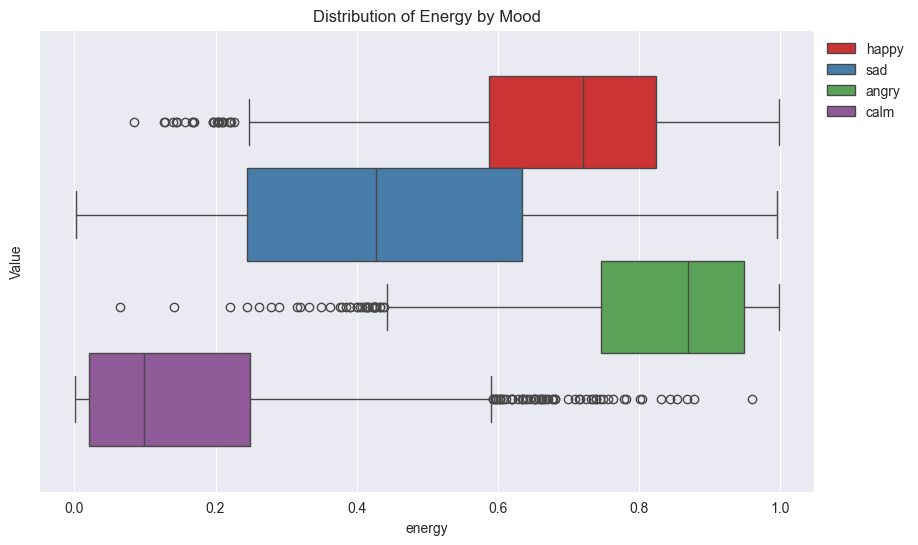

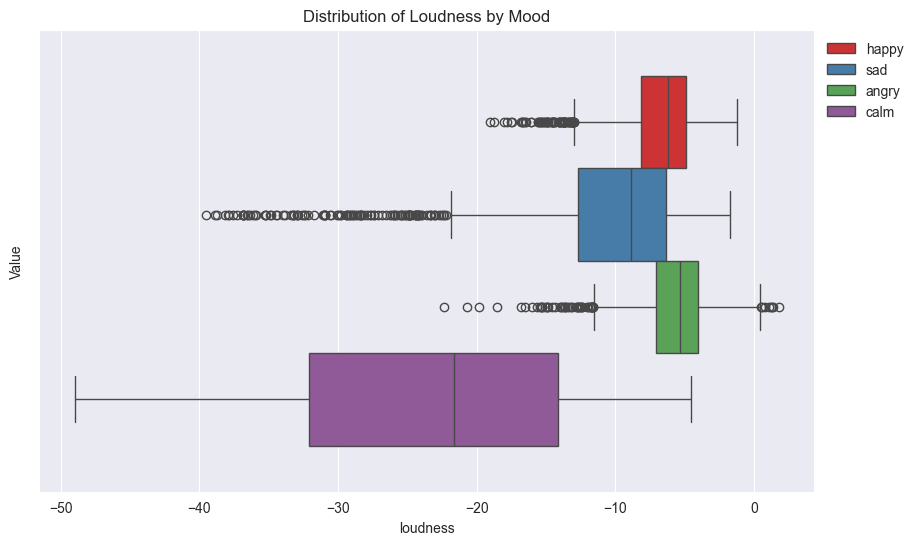

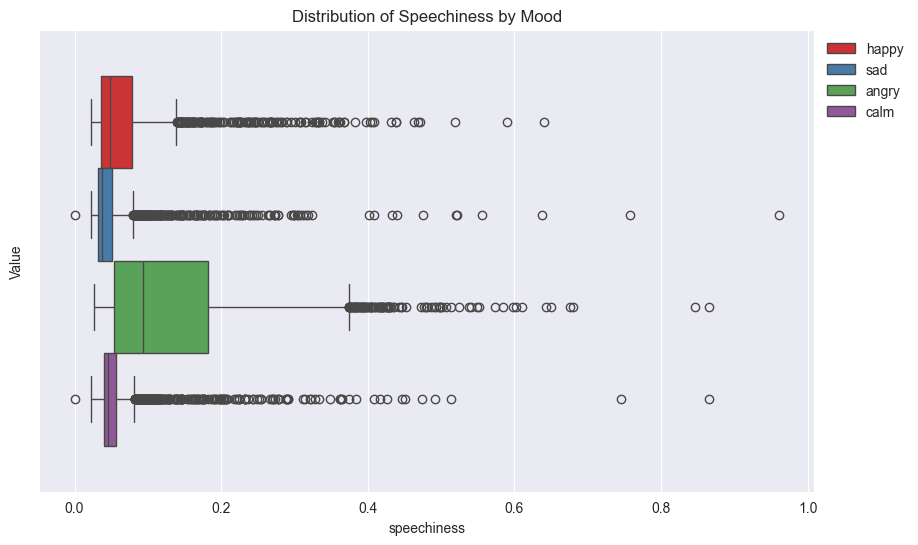

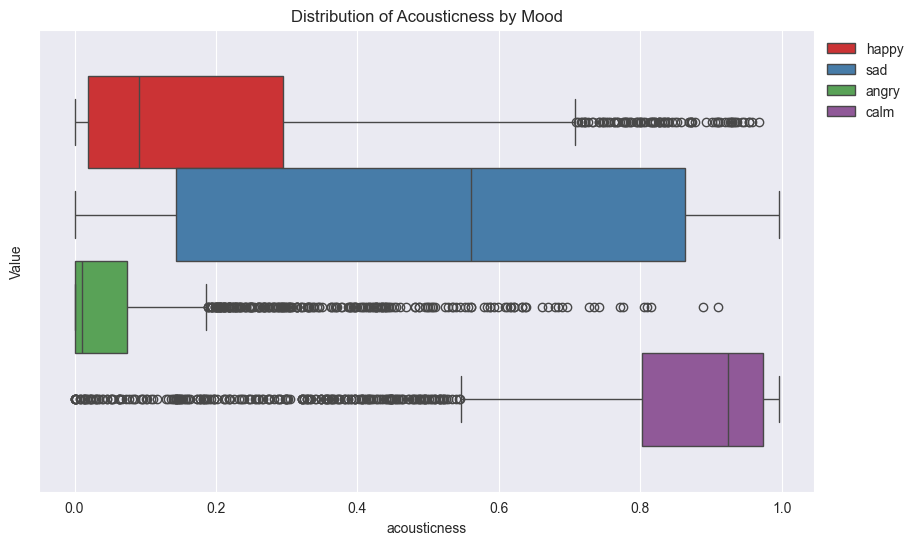

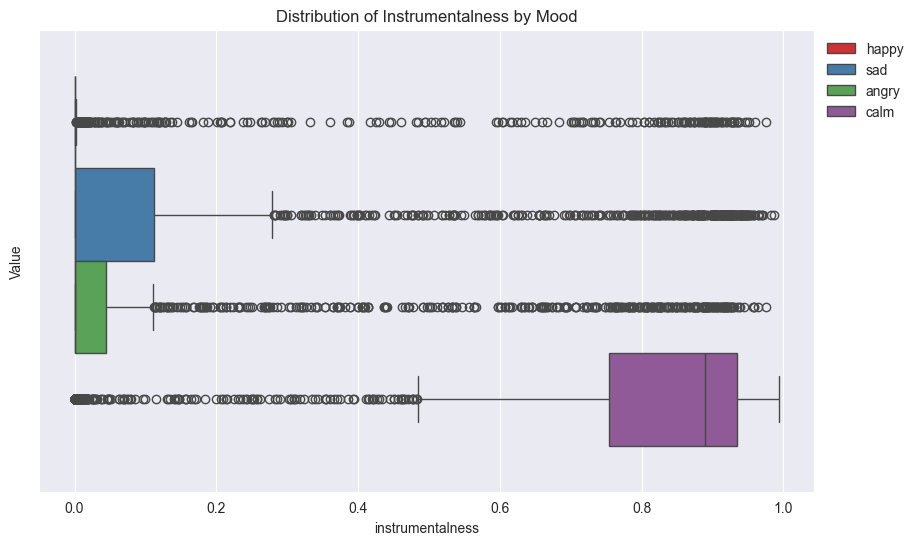

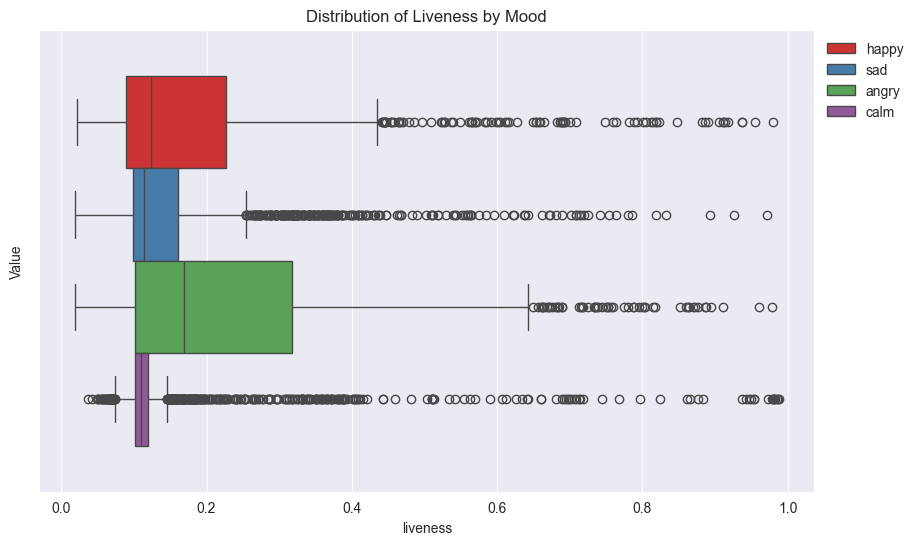

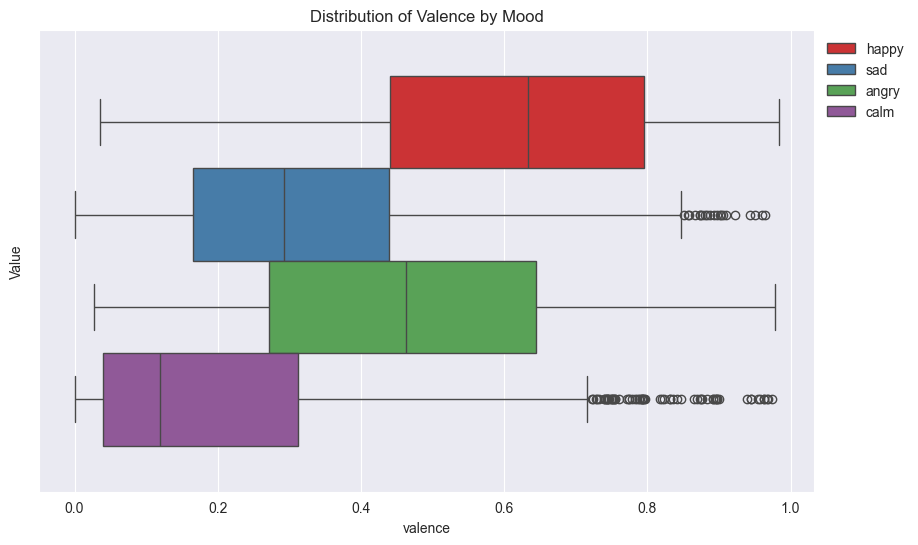

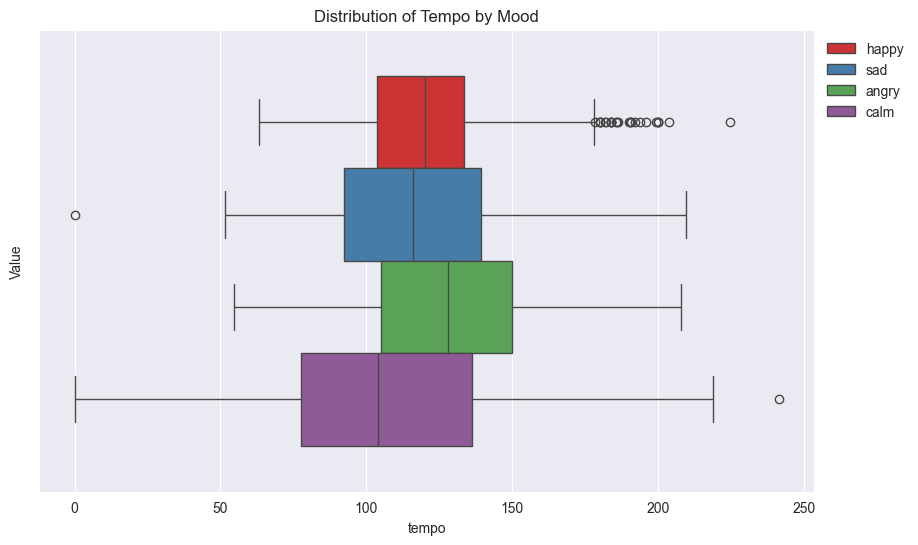

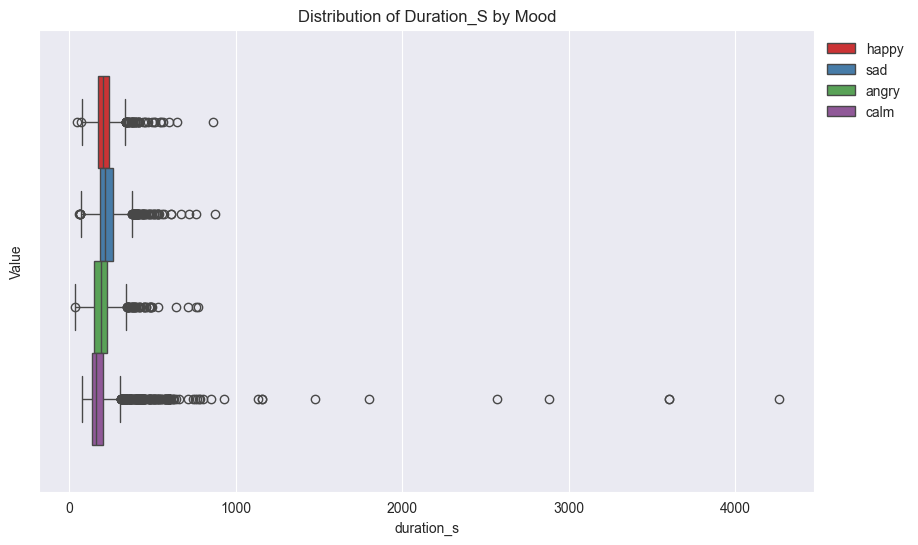

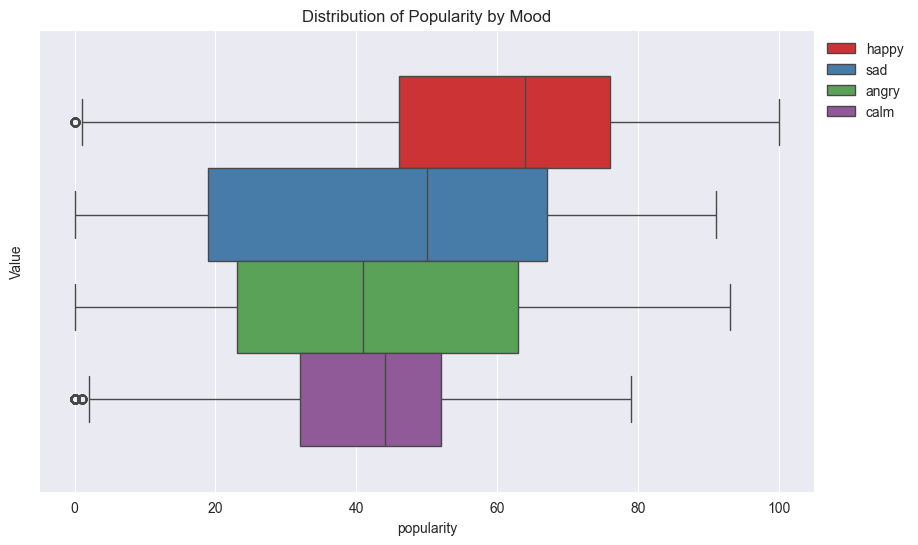

In [34]:
create_visualization(track_df, sns.boxplot, hue='mood', palette='Set1')

In [35]:
track_df.to_csv('/Users/bryanzhang/Desktop/career/projects/harmonic_horizons/data/cleaned_tracks.csv')